In [1]:
# Install TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10 # 10 tane sınıf olduğunda n cifar10 deniyormuş

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
y_train,t_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# Number of classes
K = len(set(y_train)) # eşsiz değerleri almak için set yazdık
print("number of classes:",K)

number of classes: 10


In [5]:
# Build the model using the funcional API
i = Input(shape=x_train[0].shape)
X = Conv2D(32,(3,3),strides=2,activation='relu')(i)
X = Conv2D(64,(3,3),strides=2,activation='relu')(X)
X = Conv2D(128,(3,3),strides=2,activation='relu')(X)
X = Flatten()(X)
X = Dropout(0.5)(X)
X = Dense(1024,activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(K, activation='softmax')(X)

model = Model(i,X)

In [6]:
# Compile and fit
# Note: make sure you're using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3507 - loss: 1.7661 - val_accuracy: 0.5286 - val_loss: 1.3106
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5327 - loss: 1.3100 - val_accuracy: 0.5905 - val_loss: 1.1355
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5847 - loss: 1.1576 - val_accuracy: 0.6300 - val_loss: 1.0488
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6228 - loss: 1.0530 - val_accuracy: 0.6565 - val_loss: 0.9744
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6546 - loss: 0.9664 - val_accuracy: 0.6843 - val_loss: 0.9084
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6767 - loss: 0.9124 - val_accuracy: 0.6886 - val_loss: 0.9093
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7001 - loss: 0.8444 - val_accuracy: 0.7031 - val_loss: 0.8570
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7129 - loss: 0.8130

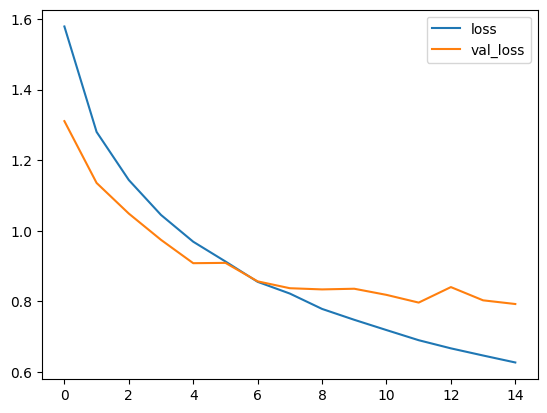

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

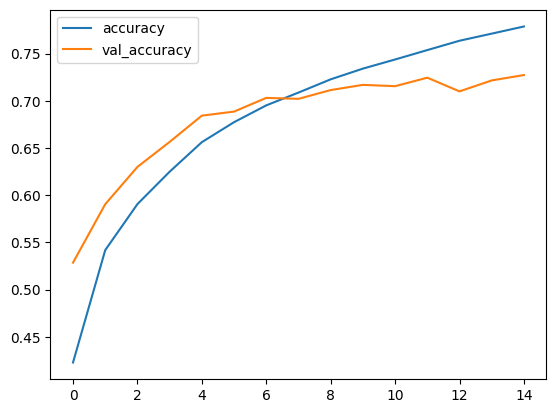

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, withoud normalization
[[704  18  43  24  31  14  11  14  76  65]
 [  9 818   4   8   3   5   8   1  28 116]
 [ 63   5 533  61 128  86  78  19  14  13]
 [ 10   7  43 510  75 231  72  27   8  17]
 [ 14   4  41  48 741  38  57  46   9   2]
 [  6   2  36 143  65 668  29  39   2  10]
 [  3   1  18  59  41  25 835   6   5   7]
 [  9   4  19  33  69  74  11 766   3  12]
 [ 31  27   6  19   5  11  13   3 852  33]
 [ 16  59   4  14   5   5   9  12  30 846]]


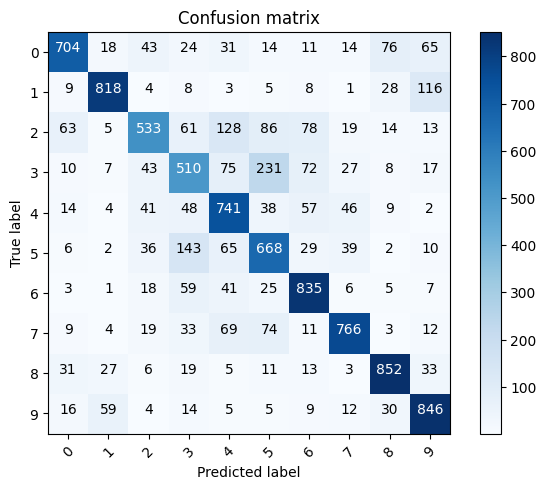

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  #This function prints and plots the confusion matrix.
  #Normalization can be applied by setting "normalize=True"

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, withoud normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh =cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [10]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

TypeError: only integer scalar arrays can be converted to a scalar index

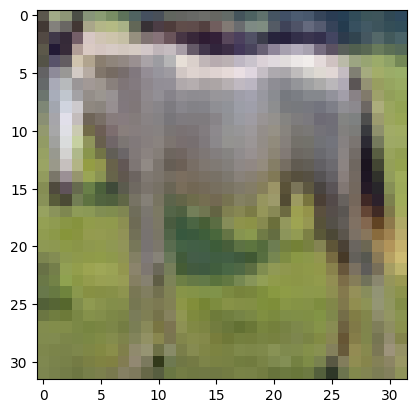

In [11]:
#Show some misclassified examples
#TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predictied: %s " %(labels[y_test[i]],labels[p_test[i]]));